In [1]:
import os
import torch
import yaml
from pathlib import Path
import random
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import plotly.graph_objects as go
from torch.utils.data import Dataset

from nerfstudio.configs import base_config as cfg
from nerfstudio.configs.method_configs import method_configs
from nerfstudio.data.dataparsers.nerfosr_dataparser import NeRFOSR, NeRFOSRDataParserConfig
from nerfstudio.pipelines.base_pipeline import VanillaDataManager
from nerfstudio.field_components.field_heads import FieldHeadNames
from nerfstudio.cameras.rays import RayBundle, RaySamples, Frustums
from nerfstudio.utils.colormaps import apply_depth_colormap
from nerfstudio.field_components.encodings import SHEncoding, NeRFEncoding
import tinycudann as tcnn

from reni_neus.models.reni_neus_model import RENINeuSFactoModelConfig, RENINeuSFactoModel
from reni_neus.utils.utils import look_at_target, random_points_on_unit_sphere
from reni_neus.data.datamanagers.reni_neus_datamanager import RENINeuSDataManagerConfig, RENINeuSDataManager
from reni_neus.configs.ddf_config import DirectionalDistanceField
from reni_neus.configs.reni_neus_config import RENINeuS
from reni_neus.utils.utils import find_nerfstudio_project_root, rot_z

project_root = find_nerfstudio_project_root(Path(os.getcwd()))
# set current working directory to nerfstudio project root
os.chdir(project_root)

# setup config
test_mode = 'test'
world_size = 1
local_rank = 0
device = 'cuda:0'

reni_neus_config = RENINeuS
pipeline = reni_neus_config.config.pipeline.setup(device=device, test_mode=test_mode, world_size=world_size, local_rank=local_rank)
datamanager = pipeline.datamanager
model = pipeline.model
model = model.eval()

Setting up training dataset...

Caching all 160 images.

Output()

Setting up evaluation dataset...

Caching all 95 images.

Output()

Caching all 95 images.

Output()

Caching all 95 images.

Output()

In [2]:
ray_bundle, batch = datamanager.get_nerfosr_lighting_eval_bundle(stage='compare')

In [5]:
ray_bundle.camera_indices.shape

torch.Size([256, 1])

In [18]:
image_idx, camera_ray_bundle, batch = datamanager.next_eval_image(step=0)

In [20]:
batch['mask'].shape

torch.Size([823, 1280, 4])

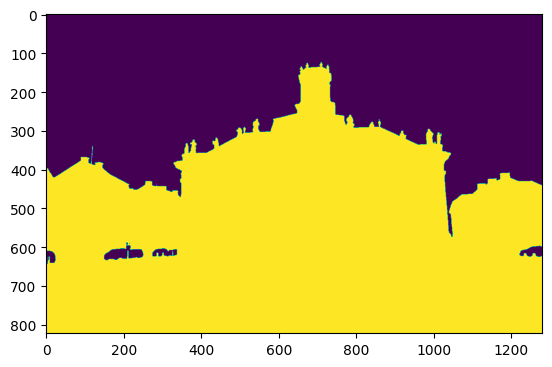

In [21]:
plt.imshow(batch['mask'][:, :, 0].cpu().detach().numpy())

In [7]:
len(datamanager.eval_session_compare_dataloader)

95